In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc +  'life_expectancy.csv')
#데이터 불러오기 
life.head()

life = life[['Life expectancy', 'Alcohol', 'Percentage expenditure', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']]
life.dropna(inplace = True)
X = life[['Alcohol', 'Percentage expenditure', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']

In [4]:
from sklearn.preprocessing import PolynomialFeatures #preprocessing 서브모듈의 polynomialFeature 클래스를 활용
poly_feature = PolynomialFeatures(degree = 3)        #3차다항식을 위한 다항식으로 변환
X = poly_feature.fit_transform(X)                    

변환한 데이터를 이용하여 학습을 수행하고, 훈련용 데이터와 검증용 데이터를 실제 데이터와 비교

Mean squred error: 21.59889394280327


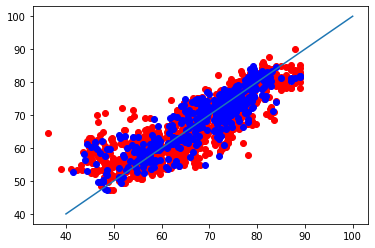

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2) 
lin_model = LinearRegression()                      #선형회귀
lin_model.fit(X_train, y_train)                     #x와 y를 학습시키겠다.

y_hat_train = lin_model.predict(X_train)
y_hat_test = lin_model.predict(X_test)
plt.scatter(y_train, y_hat_train, color='r')        #붉은색이 훈련용 데이터
plt.scatter(y_test, y_hat_test, color='b')          #파란색이 검증용 데이터
plt.plot([40, 100], [40, 100])
print('Mean squred error:', mean_squared_error(y_test, y_hat_test))  #평균제곱오차(MSE) : 26 //줄어들었다.

!!선형 회귀와 다항 회귀
다항회귀를 통해 더 좋은 예측 성능을 가진 회귀 함수 찾기 가능
(그렇다고 언제나 다항회귀가 더 옳은 것은 아니다.)

In [6]:
print('Mean squred error:', mean_squared_error(y_train, y_hat_train)) #MSE가 더 줄어들었다.

Mean squred error: 23.326396861575244


4차 다항 회귀,6차 다항 회귀, 8차 다항 회귀
------------------------------------>
과적합 : 훈련용 데이터에만 지나치게 맞춰진 것 , 일반화 능력 감소

In [7]:
X.shape #차수를 15정도로 높인것

(2306, 84)

정보량 = 엔트로피
섞여있는 데이터들의 정보량이 얼마인지 알 수 있다.
정보이득(정보량의 감소) = 원래의 정보량 - 분할 후의 정보량

분류를 학습하면서 다루었던 붓꽃 데이터를 이용하여 결정 트리를 만들어보자

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
X,y = iris.data, iris.target
#결정 트리 클래스 import한 뒤, 읽어들인 데이터를 이용하여 학습을 하도록한다. 우선 결정트리 분류기를 dec_tree라는 이름으로 생성 
#이때 트리의 깊이는 3

In [9]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [11]:
from sklearn.tree import export_graphviz
export_graphviz(
    dec_tree, 
    out_file=("./dec_tree_for_iris.dot"),
    feature_names=iris.feature_names,
)


dot파일을 실행하여 jpg를 만든다.

In [15]:
!dot  -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

import matplotlib.pyplot as plt
dec_tree_img = plt.imread('./dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12, 8), dpi=80,
            facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)

'dot'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


FileNotFoundError: [Errno 2] No such file or directory: './dec_tree_for_iris.jpg'

서포트 벡터 머신: SVM
인공 신경망이 딥러닝을 통해 인공지능의분야의 중심으로 떠오르기 전에 가장 각광받던 방법 중의 하나

서포트 벡터 머신(이하 SVM)은 결정 경계(Decision Boundary), 즉 분류를 위한 기준 선을 정의하는 모델이다. 그래서 분류되지 않은 새로운 점이 나타나면 경계의 어느 쪽에 속하는지 확인해서 분류 과제를 수행할 수 있게 된다.

결국 이 결정 경계라는 걸 어떻게 정의하고 계산하는지 이해하는 게 중요하다는 뜻이다.

하드 마진: 어떠한 데이터도 그 마진 내에 들어오지 않는다. 이렇개 엄격하게 지켜져야 하는 마진
소프트 마진 : 일부 데이터가 마진 내에 들어오도록 허용 하면서 분리 평면을 찾는 것
서포트 마진 : 양쪽에 서로 다른 그룹에 속하는 데이터들이 하나씩 닿아 있는 것

서이런 킷을 이용한 서포트 벡터 머신 사용하기

In [30]:
import pandas as pd
import numpy as np
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc + 'two_classes.csv')
df.tail(5)

#모두 1000개의 데이터 인스턴스 존재

,x1,x2,y
995,2.664896,-1.955326,0
996,-2.019928,0.334542,1
997,-4.634470,0.300158,1
998,1.426275,-2.765590,0
999,1.988053,1.466494,0


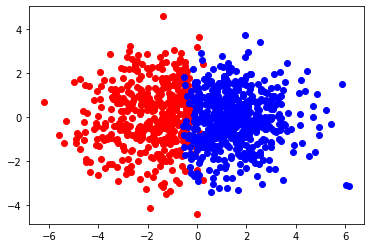

In [31]:
df_positive = df[df['y']>0]     #y가 1인 데이터만 추출
df_nagative = df[df['y']==0]    #y가 0인 데이터만 추출
import matplotlib.pyplot as plt
plt.scatter(df_positive['x1'], df_positive['x2'], color='r') #레이블이 1인 데이터를 빨간색으로 
plt.scatter(df_nagative['x1'], df_nagative['x2'], color='b') #레이블이 0인 데이터를 파란색으로

In [32]:
from sklearn.svm import LinearSVC      #사이런킷의 선형 SVM을 사용하려면 svm 서브 모듈에 있는 LinearSVC 클래스를 import한다.
X = df[['x1', 'x2']].to_numpy()        #x1, x2를 입력 벡터로 한다.
y = df['y']                            #y열의 값이 레이블
svm_simple = LinearSVC(C=1, loss='hinge') #SVM 클래스 생성
svm_simple.fit(X, y)                   #입력과 레이블로 SVM 학습 실시

LinearSVC(C=1, loss='hinge')

In [33]:
#학습 -> 회귀 분석 사용 했던 것 처럼 predict() 함수를 이용하여 입력을 넣고,레이블 예측

In [34]:
svm_simple.predict([[0.12, 0.56], [-4, 40], [0, 40], [5, 20]]) #4개의 데이터 인스턴스 주고 예측

array([0, 1, 1, 0], dtype=int64)

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svm_std = Pipeline([                        #데이터라인으로 svm 객체 구성
    ("std", StandardScaler()),              #데이터 표준화 단계 포함
    ("lsvm", LinearSVC(C=1, loss='hinge')), #선형 svm분류기 포함
])
svm_std.fit(X, y)

Pipeline(steps=[('std', StandardScaler()),
                ('lsvm', LinearSVC(C=1, loss='hinge'))])

### LAB 6-4: 비선형 SVM을 이용한 데이터 분류

In [45]:
import pandas as pd
import numpy as np

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc + 'twisted_data.csv')
print(df.tail(5))

           x1        x2  y
995  1.112475 -0.180790  0
996 -2.544258 -0.559755  0
997 -1.044663  0.164435  1
998 -1.475026 -0.683385  0
999  1.860988  0.728986  1


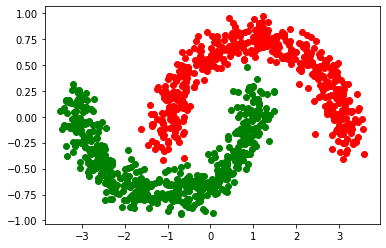

In [46]:
df_positive = df[df['y']>0]
df_negative = df[df['y']==0]
import matplotlib.pyplot as plt
plt.scatter(df_positive['x1'], df_positive['x2'], color='r')
plt.scatter(df_negative['x1'], df_negative['x2'], color='g')

In [47]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from yellowbrick.contrib.classifier import DecisionViz
X = df[['x1', 'x2']].to_numpy()
y = df['y']

ModuleNotFoundError: No module named 'yellowbrick'

In [48]:
polynomial_svm_clf = Pipeline([
   ("scaler", StandardScaler()),
   ("poly_features", PolynomialFeatures(degree=5)),
   ("svm_clf", LinearSVC(C=1, loss="hinge"))
])
polynomial_svm_clf.fit(X, y)
viz = DecisionViz(polynomial_svm_clf, title="polynomial feature SVM")
viz.fit(X, y)
viz.draw(X, y)

C:\Users\98040\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


NameError: name 'DecisionViz' is not defined

### 6.15 커널 트릭을 이용한 비선형 서포트 벡터 머신

### LAB 6-5: 커널 트릭을 이용한 비선형 SVM

In [50]:
import pandas as pd
import numpy as np

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc + 'twisted_data.csv')

from sklearn.svm import SVC  # 커널 트릭을 사용할 수 있는 SVM 분류기
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from yellowbrick.contrib.classifier import DecisionViz

X = df[['x1', 'x2']].to_numpy()
y = df['y']

ModuleNotFoundError: No module named 'yellowbrick'

In [51]:
polynomial_svm_clf = Pipeline([
   ("scaler", StandardScaler()),
   ("svm_clf", SVC(C=10, kernel = 'poly', degree = 4, coef0=2))
])
polynomial_svm_clf.fit(X, y)
viz = DecisionViz(polynomial_svm_clf, title="polynomial feature SVM")
viz.fit(X, y)
viz.draw(X, y)

NameError: name 'DecisionViz' is not defined